In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
import matplotlib
%matplotlib widget

In [2]:
plt.rcParams.update({'font.size': 12})

In [3]:
pathL = Path('../data/raw/Loading/Ruby/')
pathUL = Path('../data/raw/Unloading/Ruby/')

In [4]:
data_dict = {}
for file in pathL.iterdir() :
    if str(file).endswith('.csv'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict[file_num] = pd.read_csv(
        file,
        delimiter='\t',
        usecols=[0, 1],
        skiprows=[0],
        names=['Wavelength','Intensity']
        ).dropna()
for file in pathUL.iterdir() :
    if str(file).endswith('.csv'): 
        file_num = int(re.split('_', str(file.name))[0])
        data_dict[file_num] = pd.read_csv(
        file,
        delimiter='\t',
        usecols=[0, 1],
        skiprows=[0],
        names=['Wavelength','Intensity']
        ).dropna()

In [5]:
data_dict.keys()

dict_keys([49, 34, 46, 50, 33, 107, 106, 105])

## Some ruby Flurescence plots at high pressure and unloading.

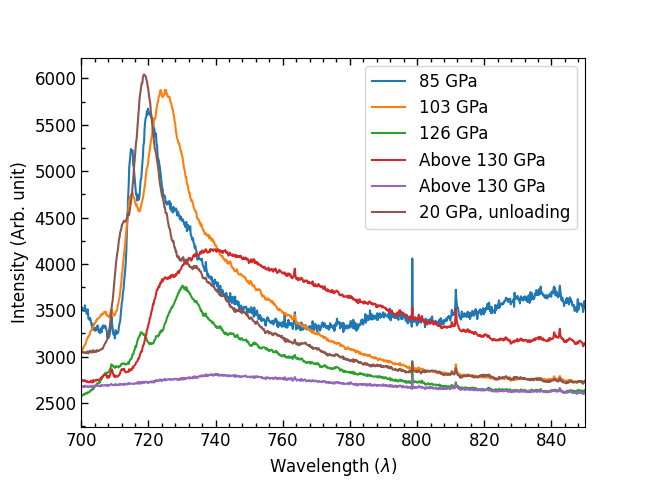

In [6]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
labels  = ['85 GPa','103 GPa','126 GPa','Above 130 GPa','Above 130 GPa', '20 GPa, unloading']
i =0
for file in [33,34,49,46,50, 107]: #Plotting Unloading data files
        df = data_dict[file]
        ax.plot(df.Wavelength, df.Intensity, label= labels[i]) #Factor of 1000 to convert to mOhms resistance.
        i+=1
#ax.legend(title ='P (GPa), Unloading',bbox_to_anchor=(0.0, 0.3, 1., .102),loc = 'lower right', fontsize = 10, borderpad = 0.08, labelspacing = 0.2,ncol = 5).set_zorder(0)
ax.legend()
ax.yaxis.tick_left()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlim(700, 850)
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = False)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = False)
ax.set_xlabel('Wavelength ($\lambda$)')
ax.set_ylabel('Intensity (Arb. unit)');

In [7]:
#plt.savefig('../publication_ready/Ruby_ReMoB2.pdf',bbox_inches='tight')